In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\corporate_stress_dataset.csv')

# info about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  obj

In [3]:
print(data.head())

   ID  Age      Gender Marital_Status   Job_Role  Experience_Years  \
0   1   56  Non-Binary        Widowed  Developer                 5   
1   2   46      Female         Single    Analyst                20   
2   3   32      Female         Single  Developer                10   
3   4   60      Female       Divorced    Analyst                26   
4   5   25        Male        Married      Sales                29   

   Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0           102703.08                      44                1.72   
1           165583.91                      54                0.62   
2            38005.39                      81                1.22   
3            51127.36                      79                2.03   
4           174597.45                      63                1.45   

   Remote_Work  ...  Work_Life_Balance Family_Support_Level Job_Satisfaction  \
0         True  ...                  9                    2                5   
1   

In [4]:
data = data.drop(columns=['ID'])

#One-Hot Encoding for categorical variables
categorical_columns = ['Gender', 'Marital_Status', 'Job_Role', 'Company_Size', 
                       'Department', 'Location', 'Health_Issues', 'Burnout_Symptoms']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

#Converting boolean columns to integers (True = 1, False = 0)
bool_columns = ['Remote_Work', 'Mental_Health_Leave_Taken', 
                'Training_Opportunities', 'Gender_Bias_Experienced', 'Discrimination_Experienced']
data[bool_columns] = data[bool_columns].astype(int)

print("\nUpdated Dataset Info:")
print(data.info())

print("\nSample Data:")
print(data.head())


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Experience_Years                  50000 non-null  int64  
 2   Monthly_Salary_INR                50000 non-null  float64
 3   Working_Hours_per_Week            50000 non-null  int64  
 4   Commute_Time_Hours                50000 non-null  float64
 5   Remote_Work                       50000 non-null  int32  
 6   Stress_Level                      50000 non-null  int64  
 7   Sleep_Hours                       50000 non-null  float64
 8   Physical_Activity_Hours_per_Week  50000 non-null  float64
 9   Mental_Health_Leave_Taken         50000 non-null  int32  
 10  Manager_Support_Level             50000 non-null  int64  
 11  Work_Pressure_Level               50000 non-

C:\Users\dell\AppData\Local\Temp\ipykernel_22368\3741164202.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


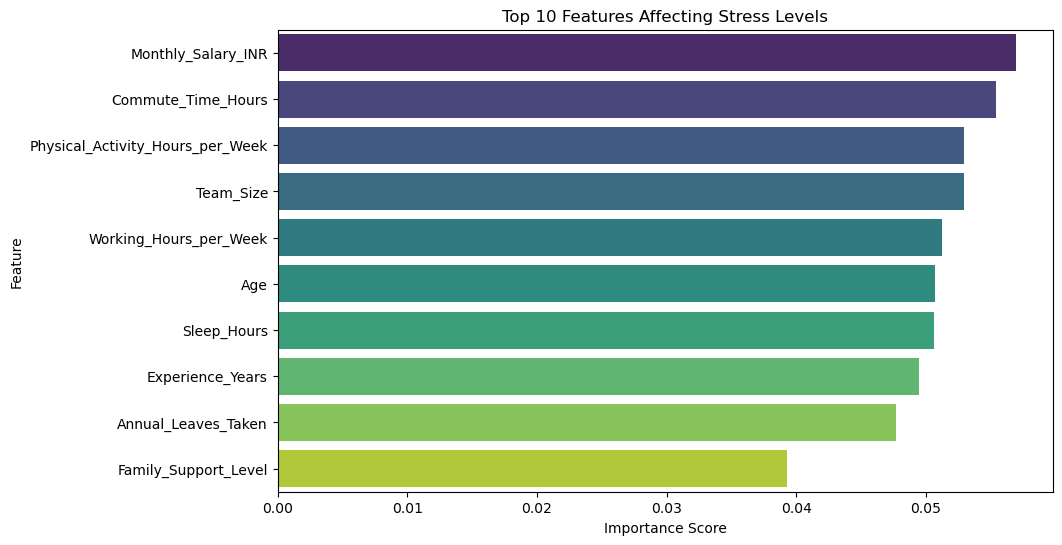


Top 10 important features based on Random Forest:
                             Feature  Importance
2                 Monthly_Salary_INR    0.056912
4                 Commute_Time_Hours    0.055383
7   Physical_Activity_Hours_per_Week    0.052950
16                         Team_Size    0.052944
3             Working_Hours_per_Week    0.051200
0                                Age    0.050702
6                        Sleep_Hours    0.050596
1                   Experience_Years    0.049487
11               Annual_Leaves_Taken    0.047652
13              Family_Support_Level    0.039250


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Define features and target
X = data.drop(columns=['Stress_Level'])  # Drop the target column from features
y = data['Stress_Level']  # Target variable

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Affecting Stress Levels')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#Display the top 10 important features
print("\nTop 10 important features based on Random Forest:")
print(importance_df.head(10))

C:\Users\dell\AppData\Local\Temp\ipykernel_22368\2904862013.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_sorted_df.head(10), palette='viridis')


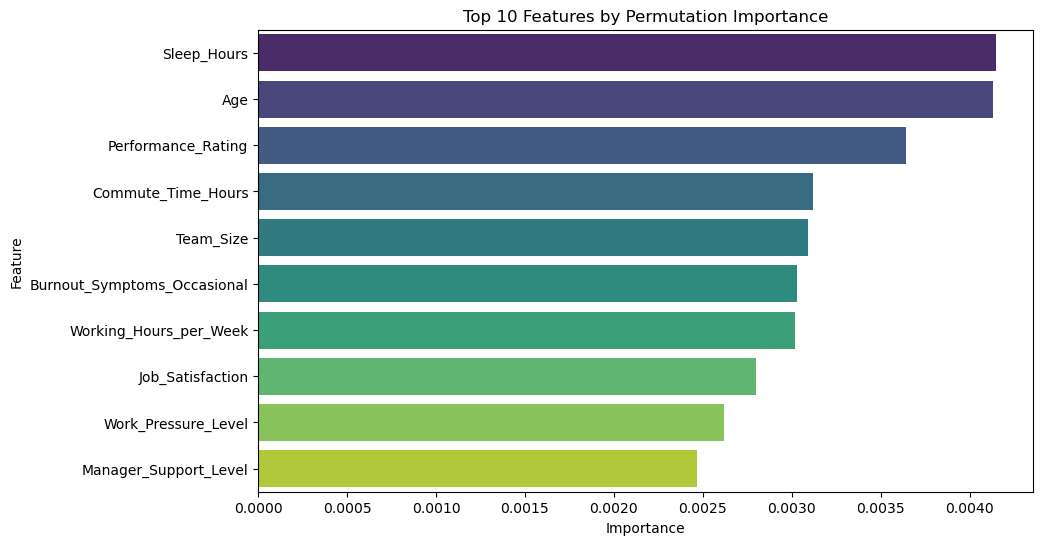

Top 10 features by permutation importance:
                        Feature  Importance
6                   Sleep_Hours     0.00415
0                           Age     0.00413
15           Performance_Rating     0.00364
4            Commute_Time_Hours     0.00312
16                    Team_Size     0.00309
42  Burnout_Symptoms_Occasional     0.00303
3        Working_Hours_per_Week     0.00302
14             Job_Satisfaction     0.00280
10          Work_Pressure_Level     0.00262
9         Manager_Support_Level     0.00247


In [6]:
from sklearn.inspection import permutation_importance

#permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

perm_sorted_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_sorted_df = perm_sorted_df.sort_values(by='Importance', ascending=False)

#top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_sorted_df.head(10), palette='viridis')
plt.title('Top 10 Features by Permutation Importance')
plt.show()

print("Top 10 features by permutation importance:")
print(perm_sorted_df.head(10))